In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import requests
import bs4

# Exploratory Data Analysis

In [2]:
auto = pd.read_csv('automation_data_by_state.csv', encoding='cp1252')
salary = pd.read_excel('occupation_salary.xlsx')

In [3]:
auto.columns, salary.columns

(Index(['SOC', 'Occupation', 'Probability', 'Alabama', 'Alaska', 'Arizona',
        'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
        'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'],
       dtype='object'),
 Index(['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
        'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
        'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN

In [107]:
auto.head(20)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.0150,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.1600,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.0390,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.0140,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.0130,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
5,11-2031,Public Relations and Fundraising Managers,0.0150,400,150,1240,300,7010,960,980,...,0,870,3680,380,210,1250,2100,130,1010,0
6,11-3011,Administrative Services Managers,0.7300,640,530,6870,1850,40720,2280,4110,...,340,7550,20440,2120,410,4120,4890,1590,6070,220
7,11-3021,Computer and Information Systems Managers,0.0350,3260,340,6720,2100,51840,6340,7900,...,210,5540,20010,4190,340,13720,11790,720,6400,200
8,11-3031,Financial Managers,0.0690,4990,870,10930,3020,70540,5930,14210,...,610,13690,27670,4860,740,13370,12680,1580,8810,560
9,11-3051,Industrial Production Managers,0.0300,3110,110,2530,1700,19120,1100,2800,...,400,5030,10150,1840,400,2400,2500,700,6720,290


In [108]:
salary.head(20)

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,NaN,NaN
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,NaN,NaN
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
5,11-1020,General and Operations Managers,broad,2188870,0.3,58.7,122090,0.2,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#,NaN,NaN
6,11-1021,General and Operations Managers,detailed,2188870,0.3,58.7,122090,0.2,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#,NaN,NaN
7,11-1030,Legislators,broad,53670,1.3,*,44820,1.1,*,*,*,*,*,17230,18560,23470,67670,96500,True,NaN
8,11-1031,Legislators,detailed,53670,1.3,*,44820,1.1,*,*,*,*,*,17230,18560,23470,67670,96500,True,NaN
9,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,663960,0.5,65.39,136020,0.3,28.1,39.82,57.89,81.3,#,58450,82820,120420,169110,#,NaN,NaN


<AxesSubplot:xlabel='OCC_GROUP'>

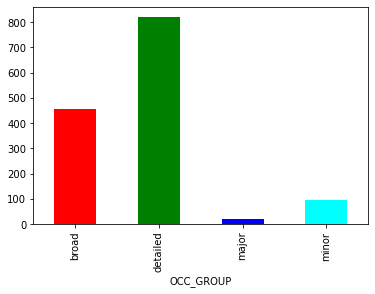

In [52]:
salary_plot = salary.loc[(salary['OCC_GROUP'] != 'total')].groupby("OCC_GROUP")['OCC_CODE'].count()
salary_plot.plot(kind = 'bar', color = ['red', 'green', 'blue', 'cyan'])
#number of jobs in each group

In [12]:
df = auto.merge(salary, how = 'inner', left_on = 'SOC', right_on = 'OCC_CODE')

In [109]:
df.head(20)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,11-1011,Chief Executives,0.0150,1030,760,5750,2710,31150,880,1410,...,33.55,54.86,87.12,#,#,69780,114100,181210,#,#
1,11-1021,General and Operations Managers,0.1600,26930,6490,43300,20680,261780,41540,33280,...,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#
2,11-2011,Advertising and Promotions Managers,0.0390,50,40,470,110,3760,480,300,...,21.61,32.21,48.47,70.98,#,44950,67000,100810,147640,#
3,11-2021,Marketing Managers,0.0140,530,200,4790,1090,33390,3060,4970,...,32.45,44.81,63.07,85.91,#,67490,93200,131180,178690,#
4,11-2022,Sales Managers,0.0130,2510,400,10650,2650,69180,4570,7040,...,26.82,38.18,56.71,80.91,#,55790,79420,117960,168300,#
5,11-2031,Public Relations and Fundraising Managers,0.0150,400,150,1240,300,7010,960,980,...,28.4,37.84,51.59,73.06,98.61,59070,78710,107320,151970,205110
6,11-3011,Administrative Services Managers,0.7300,640,530,6870,1850,40720,2280,4110,...,23.69,31.82,43.29,58.17,76.6,49270,66180,90050,120990,159330
7,11-3021,Computer and Information Systems Managers,0.0350,3260,340,6720,2100,51840,6340,7900,...,39.6,50.62,65.29,82.05,#,82360,105290,135800,170670,#
8,11-3031,Financial Managers,0.0690,4990,870,10930,3020,70540,5930,14210,...,31.25,42.08,58.54,81.15,#,65000,87530,121750,168790,#
9,11-3051,Industrial Production Managers,0.0300,3110,110,2530,1700,19120,1100,2800,...,28.18,35.9,46.7,61.34,79.54,58610,74670,97140,127590,165450


In [21]:
df.isnull().mean().sort_values(ascending = False)
#looks like we can probably drop the annual and hourly column considering its mostly null

HOURLY           0.995640
ANNUAL           0.973837
New Mexico       0.000000
Michigan         0.000000
Kansas           0.000000
                   ...   
Virginia         0.000000
Washington       0.000000
West Virginia    0.000000
Wisconsin        0.000000
SOC              0.000000
Length: 74, dtype: float64

In [23]:
df = df.drop(["ANNUAL", "HOURLY"], axis = 1)

In [28]:
df.shape[1]
#number of columns

72

So let's see what words are most common in our jobs so we can group them together and see if certain industries are more at risk of automation

In [136]:
def job_finder(lst):
    word = list(filter(lambda x: x.endswith('s'), lst))
    if len(word) != 0:
        return word[-1]
    else:
        return lst[-1]

In [144]:
common_words = df['Occupation'].str.replace(';',"").str.split().apply(job_finder)
common_words

0      Executives
1        Managers
2        Managers
3        Managers
4        Managers
          ...    
683       Pumpers
684       Pumpers
685    Collectors
686     Operators
687       Loaders
Name: Occupation, Length: 688, dtype: object

<AxesSubplot:ylabel='Clean Title'>

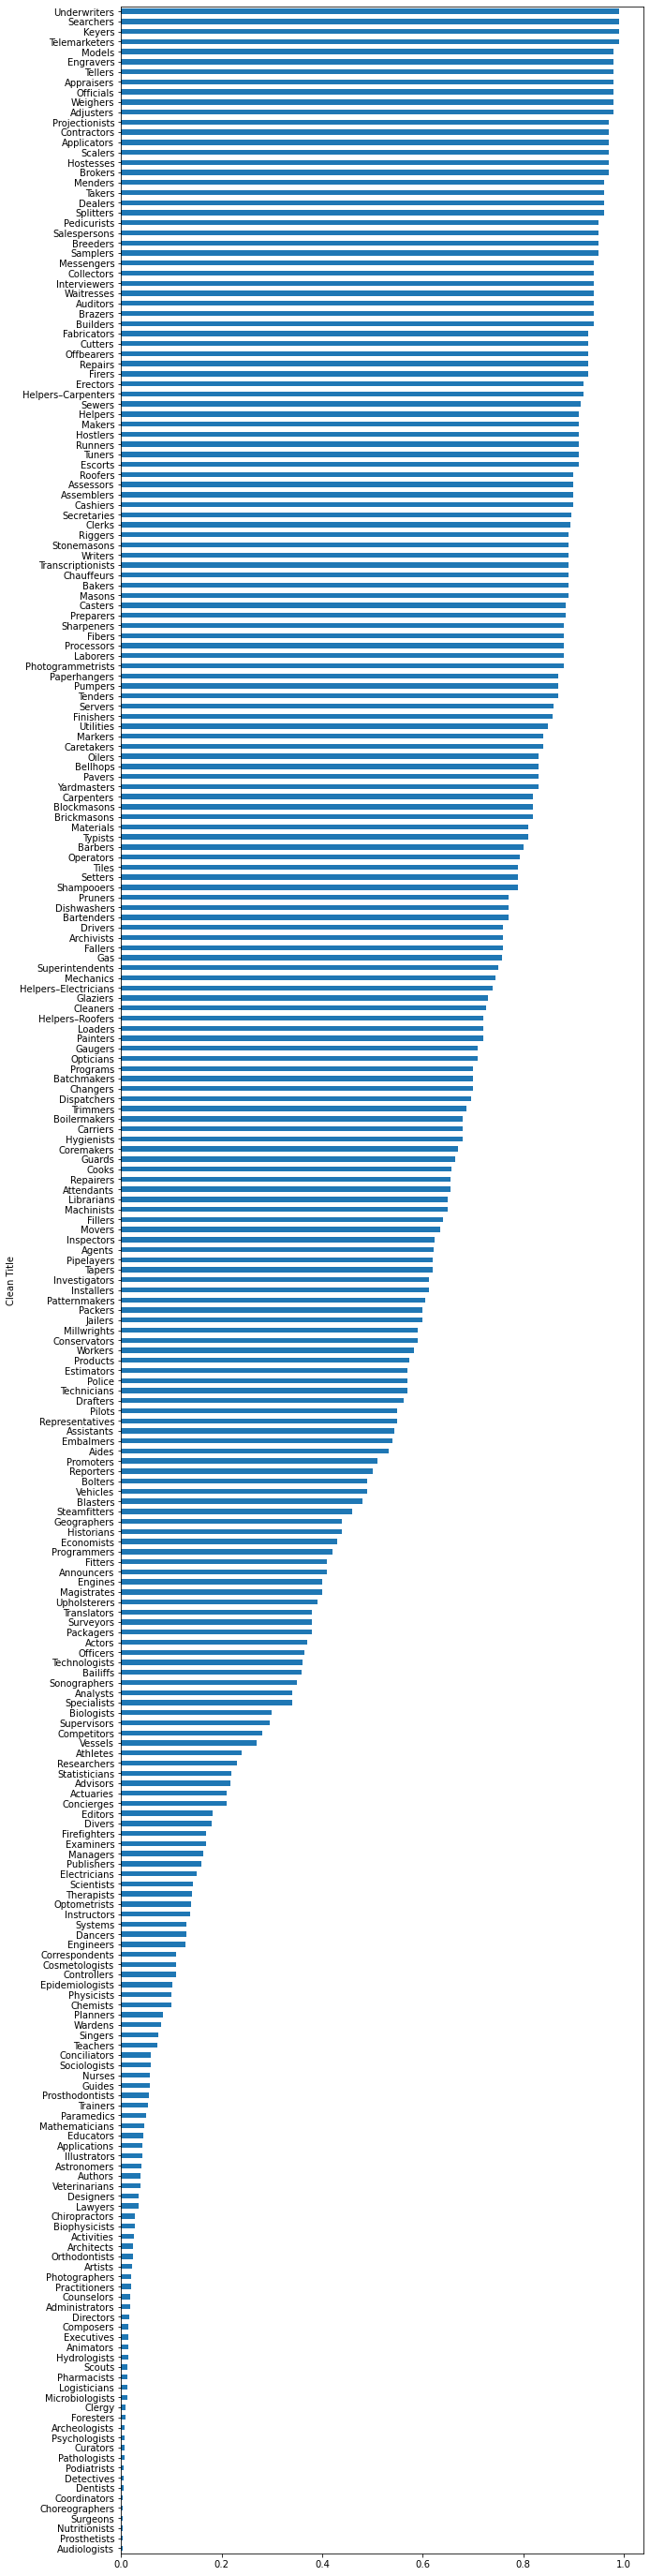

In [179]:
df['Clean Title'] = common_words
df.groupby('Clean Title')['Probability'].mean().sort_values().plot(kind = 'barh', figsize = (10, 50))

In [194]:
df.dtypes
#top 20 annual means

SOC             object
Occupation      object
Probability    float64
Alabama          int64
Alaska           int64
                ...   
A_PCT25         object
A_MEDIAN        object
A_PCT75         object
A_PCT90         object
Clean Title     object
Length: 73, dtype: object

In [169]:
df.loc[df['Clean Title'] == 'Searchers']

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Clean Title
169,23-2093,Title Examiners; Abstractors; and Searchers,0.99,270,110,770,620,5340,0,110,...,16.73,22.02,29.1,39.33,27620,34800,45800,60520,81800,Searchers


In [195]:
df.loc[df['Clean Title'] == 'Writers']

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Clean Title
217,27-3042,Technical Writers,0.89,660,70,970,170,6590,1270,690,...,25.96,33.58,43.14,53.49,41700,53990,69850,89730,111260,Writers


Well, we can drop some common words like 'And'. Also seems like some words have some punctuation that we don't really want so we can strip those ends

<AxesSubplot:>

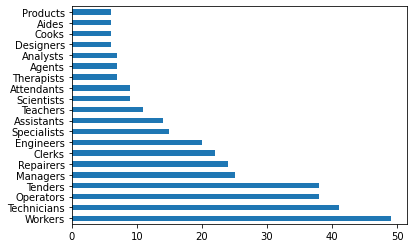

In [147]:
common_words.value_counts().head(20).plot(kind = 'barh')

<AxesSubplot:ylabel='Occupation'>

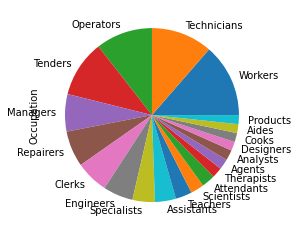

In [170]:
common_words.value_counts().head(20).plot(kind = 'pie')